In [1]:
import pandas as pd

Base risco credito

In [5]:
base_risco_credito = pd.read_csv('./assets/risco_credito.csv')

In [6]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


Separacao previsores

In [7]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values

In [8]:
Y_risco_credito = base_risco_credito.iloc[:, 4].values

Conversão atributos

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [11]:
X_risco_credito[:, 0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:, 1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:, 2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:, 3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [12]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [14]:
import pickle
with open('./assets/risco_credito.pkl', 'wb') as f:
    pickle.dump([X_risco_credito, Y_risco_credito], f)

Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, Y_risco_credito)

GaussianNB()

In [18]:
#historia boa (0), divida alta (0), garantias nenhuma (1), renda > 35 (2)]
#historia ruim (2), divida alta (0), garantia adequada (0), renda < 15 (0)

previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [19]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

Aplicando na base credit data

In [20]:
import pickle

In [22]:
with open( './assets/credit.pkl', 'rb') as f:
    X_credit_treinamento, Y_credit_treinamento,    X_credit_teste, Y_credit_teste = pickle.load(f)

In [24]:
X_credit_treinamento.shape, Y_credit_treinamento.shape

((1500, 3), (1500,))

In [25]:
X_credit_teste.shape, Y_credit_teste.shape

((500, 3), (500,))

In [26]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, Y_credit_treinamento)

GaussianNB()

In [28]:
previsoes = naive_credit_data.predict(X_credit_teste)

In [29]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [30]:
Y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [38]:
#Comparar real x previsao
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
accuracy_score(Y_credit_teste, previsoes)

0.938

In [35]:
confusion_matrix(Y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [36]:
from yellowbrick.classifier import ConfusionMatrix

0.938

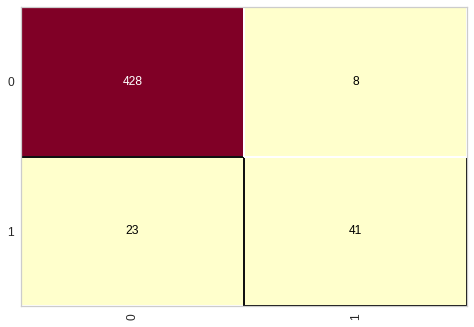

In [37]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, Y_credit_treinamento)
cm.score(X_credit_teste, Y_credit_teste)

In [40]:
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



    Base census

In [41]:
with open( './assets/census.pkl', 'rb') as f:
    X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [42]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 108), (27676,))

In [43]:
X_census_teste.shape, Y_census_teste.shape

((4885, 108), (4885,))

In [44]:
naive_census_data = GaussianNB()
naive_census_data.fit(X_census_treinamento, Y_census_treinamento)

GaussianNB()

In [45]:
previsoes_census = naive_census_data.predict(X_census_teste)

In [46]:
previsoes_census

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [47]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [48]:
accuracy_score(Y_census_teste, previsoes_census) #sem escalonamento melhora

0.4767656090071648

In [49]:
confusion_matrix(Y_census_teste, previsoes_census)

array([[1172, 2521],
       [  35, 1157]])

0.4767656090071648

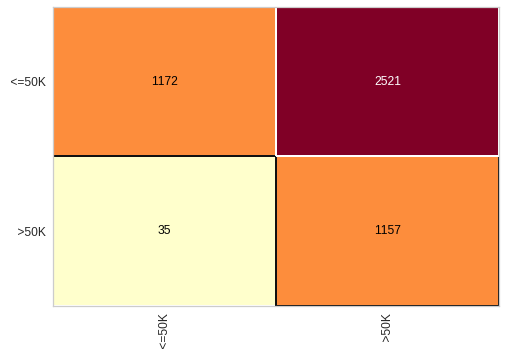

In [52]:
cm = ConfusionMatrix(naive_census_data)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [53]:
print(classification_report(Y_census_teste, previsoes_census))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

